In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    '/content/Human_Development_Index_Dataset.csv',
    encoding='latin1'
)



In [3]:
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [4]:
# 1. Extract Latest Year
print(df['year'].unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [5]:
hdi_2022_df = df[df['year'] == 2022].copy()

In [6]:
# 2. Data Exploration
print(hdi_2022_df.head(10)) # Display first 10 rows


     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

In [7]:
# 2. Data Exploration
print(hdi_2022_df.shape)    # Count rows and columns


(206, 30)


In [8]:
# 2. Data Exploration
print(hdi_2022_df.info())   # List column names and data types

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

In [9]:
# 3. Missing Values & Data Cleaning
print(hdi_2022_df.isnull().sum()) # Check missing values


Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


In [10]:
hdi_2022_df = hdi_2022_df.replace('—', np.nan) # Replace special characters with NaN
hdi_2022_df = hdi_2022_df.drop_duplicates()    # Remove duplicates
hdi_2022_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [11]:
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [12]:
# Convert columns to numbers so we can do math
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(
    hdi_2022_df['gross_inc_percap'],
    errors='coerce'
)


In [13]:
# 4. STATISTICS
print(hdi_2022_df['hdi'].describe())             # Average HDI
print(hdi_2022_df.nlargest(1, 'hdi'))        # Country with Highest HDI
print(hdi_2022_df.nsmallest(1, 'hdi'))       # Country with Lowest HDI

count    204.000000
mean       0.722887
std        0.153029
min        0.380000
25%        0.606500
50%        0.739500
75%        0.839500
max        0.967000
Name: hdi, dtype: float64
      Unnamed: 0 iso3      country  year    hdi  life_expectancy  \
5609        5610  CHE  Switzerland  2022  0.967           84.255   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
5609      8.740472  0.949369  0.977383        85.932  ...               0.971   

      gender_inequality  secondary_education_f_%  secondary_education_m_%  \
5609              0.018                96.939726                97.517437   

      seats_in_parliament_f_%  seats_in_parliament_m_%  \
5609                 39.02439                 60.97561   

      labour_participation_f_%  labour_participation_m_%  co2_emission_tons  \
5609                     61.49                     71.94            4.11755   

      mat_footprint_percap_tons  
5609                    33.5913  

[1 rows x 30 c

In [14]:
# Filter for high HDI and sort by Wealth (GNI)
top_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
top_10 = top_countries.sort_values('gross_inc_percap', ascending=False).head(10)

In [15]:
hdi_2022_df['HDI Category']=pd.cut(
    hdi_2022_df['hdi'],
    bins = [0, 0.550, 0.700, 0.800, 1.0],
    labels = ['Low', 'Medium', 'High', 'Very High']
)

In [16]:
hdi_2022_df.head(20)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI Category
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN,Very High
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN,Very High
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512,Very High
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553,High
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245,Very High
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621,Very High


In [17]:
# Saving result
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)

In [18]:
# Keep only 2020, 2021, and 2022
df_3yr = df.copy()
df_3yr = df[df['year'].isin([2020, 2021, 2022])].copy()
df_3yr['hdi'] = pd.to_numeric(df_3yr['hdi'], errors='coerce')

In [19]:
# Countries to Show
countries = ['Afghanistan','Albania','Algeria','Bangladesh','Bhutan']
subset = df_3yr[df_3yr['country'].isin(countries)]

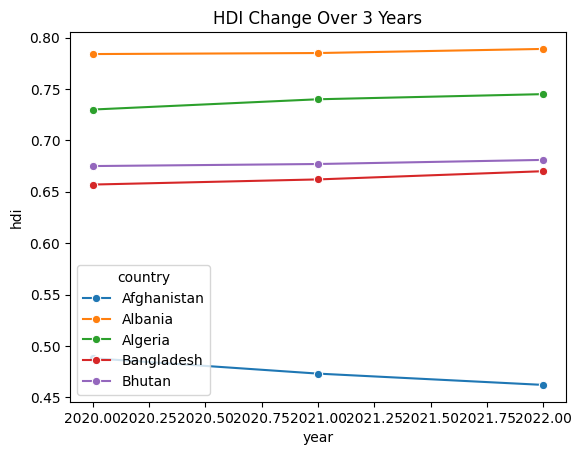

In [20]:
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o', color = 'red')
plt.title('HDI Change Over 3 Years')
plt.show()

In [21]:
df.columns

Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

Text(0.5, 1.0, 'Average HDI by Region (2020-2022)')

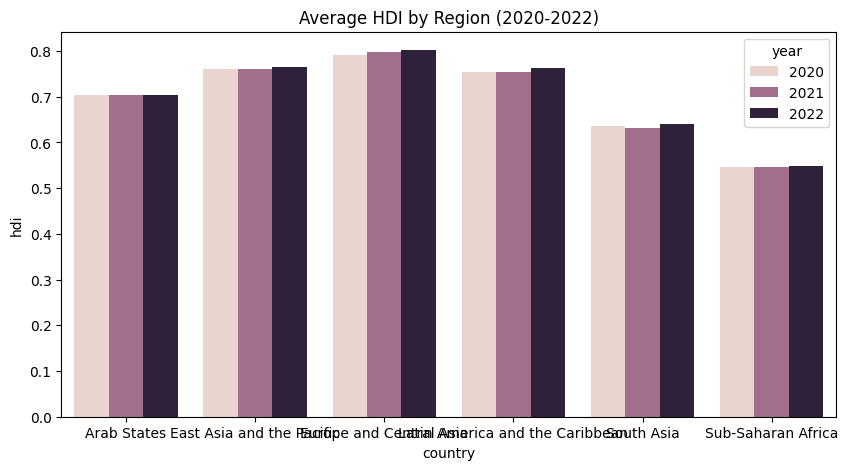

In [46]:
regions = ['Arab States', 'East Asia and the Pacific', 'Europe and Central Asia',
           'Latin America and the Caribbean', 'South Asia', 'Sub-Saharan Africa']
years = [2020, 2021, 2022]

# 3. Create Bar Chart (Using existing region rows in the CSV)
df_reg = df[df['country'].isin(regions) & df['year'].isin(years)]
plt.figure(figsize=(10, 5))
sns.barplot(data=df_reg, x='country', y='hdi', hue='year')
plt.title('Average HDI by Region (2020-2022)')


Text(0.5, 1.0, 'HDI Spread 2020-2022')

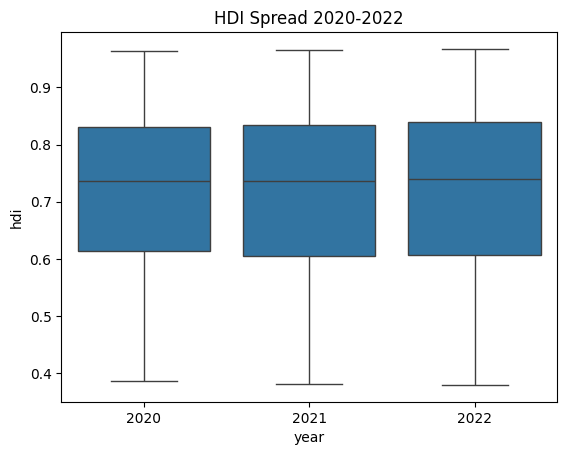

In [23]:
#Box Plot
my_years = [2020, 2021, 2022]
data = df[df['year'].isin(my_years)]


sns.boxplot(x='year', y='hdi', data=data)

plt.title('HDI Spread 2020-2022')

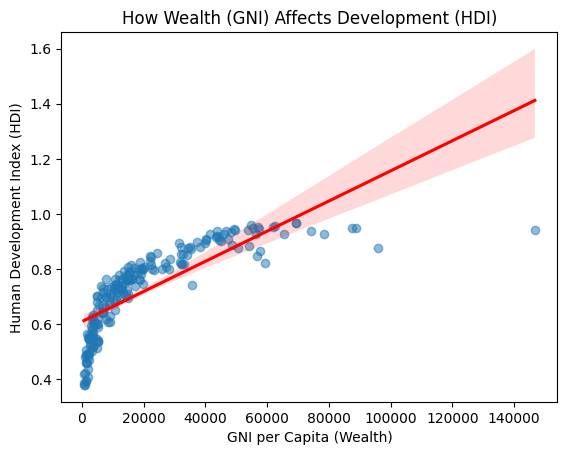

In [24]:
if 'gross_inc_percap' in df.columns:
    data_2022 = df[df['year'] == 2022]

    # Create the scatter plot with a regression line (regplot)
    sns.regplot(x='gross_inc_percap', y='hdi', data=data_2022, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    plt.title('How Wealth (GNI) Affects Development (HDI)')
    plt.xlabel('GNI per Capita (Wealth)')
    plt.ylabel('Human Development Index (HDI)')
    plt.savefig('hdi_vs_gni_scatter.png')
else:
    print("GNI per Capita variable not available in the dataset.")

In [25]:
# 4. Short Analysis Questions:
# • Which countries show the greatest improvement in HDI from 2020 to 2022?
# • Did any countries experience a decline in HDI? Provide possible reasons.
# • Which region has the highest and lowest average HDI across these three years?
# • Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
# this period.

In [26]:
# 4 Problem 2
# Advanced HDI Exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(
    '/content/Human_Development_Index_Dataset.csv',
    encoding='latin1'
)



In [28]:
# Task 1: South Asia Subset
sa_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
HDI_SouthAsia = df[df['country'].isin(sa_list)].copy()
HDI_SouthAsia.to_csv('HDI_SouthAsia.csv', index=False)

In [29]:
# Task 2: Composite Development Score
# Formula: 0.30 * LE + 0.30 * GNI + 0.40 * HDI
HDI_SouthAsia['Composite Score'] = (0.30 * HDI_SouthAsia['life_expectancy'] +
                                     0.30 * HDI_SouthAsia['gross_inc_percap'] +
                                     0.40 * HDI_SouthAsia['hdi'])

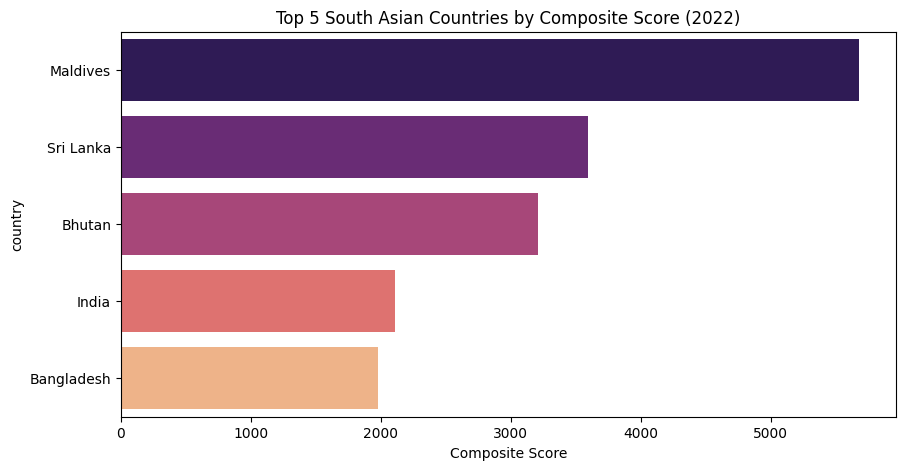

In [30]:
# Rank and Plot Top 5 (Latest Year available)
latest_sa = HDI_SouthAsia[HDI_SouthAsia['year'] == 2022].sort_values(by='Composite Score', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=latest_sa.head(5), x='Composite Score', y='country', palette='magma')
plt.title('Top 5 South Asian Countries by Composite Score (2022)')
plt.savefig('sa_composite_rank.png')

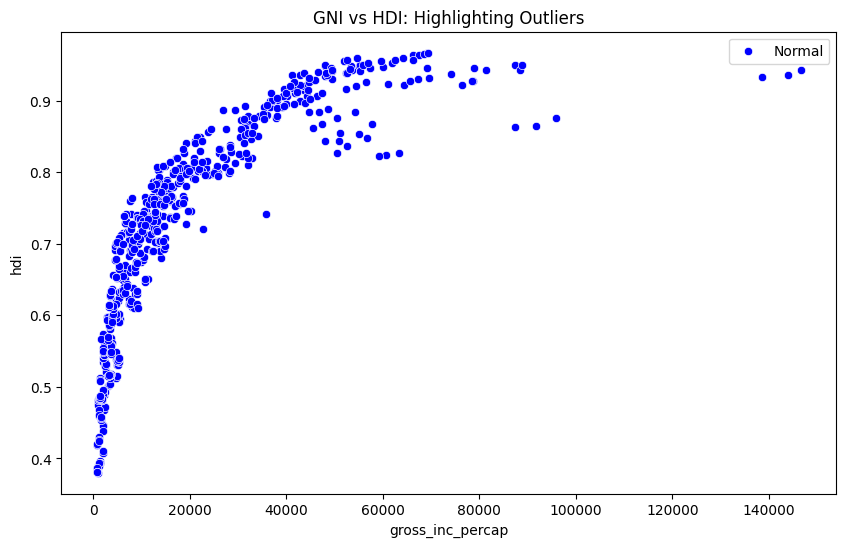

Identified Outlier Countries:
[]


In [31]:
# STEP 1: Calculate the Outlier Boundaries for HDI
q1 = df_3yr['hdi'].quantile(0.25)
q3 = df_3yr['hdi'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# This creates a new list of only the countries that are outside the limits
outliers = df_3yr[(df_3yr['hdi'] < lower_limit) | (df_3yr['hdi'] > upper_limit)]


plt.figure(figsize=(10, 6))

# Plot the regular dots in blue
sns.scatterplot(data=df_3yr, x='gross_inc_percap', y='hdi', color='blue', label='Normal')

# Plot the outliers in red on top of the blue ones
sns.scatterplot(data=outliers, x='gross_inc_percap', y='hdi', color='red', label='Outliers')

plt.title('GNI vs HDI: Highlighting Outliers')
plt.show()

# See who the outliers are
print("Identified Outlier Countries:")
print(outliers['country'].unique())

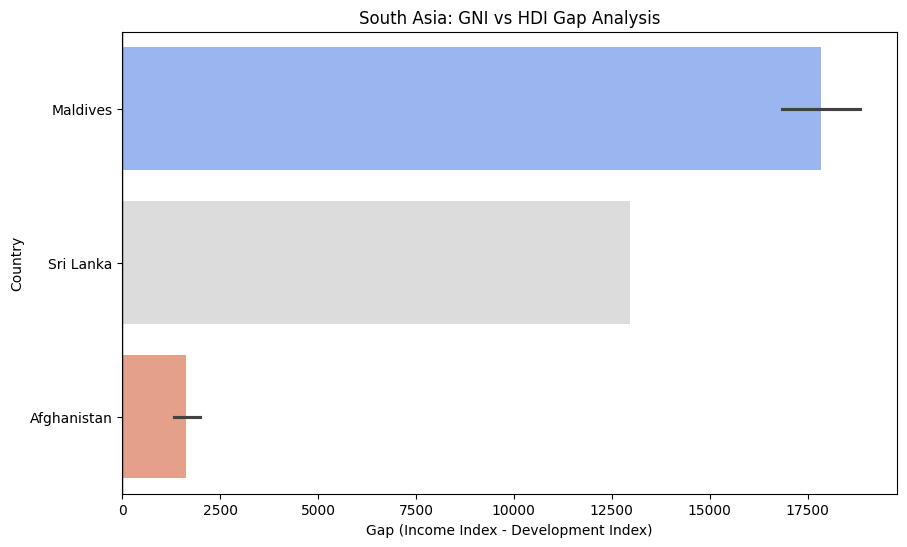

In [32]:

sa_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
sa_df = df_3yr[df_3yr['country'].isin(sa_countries)].copy()


# This tells us if a country's wealth matches its human development
sa_df['GNI_HDI_Gap'] = sa_df['gross_inc_percap'] - sa_df['hdi']


# Sort from highest to lowest
sa_sorted = sa_df.sort_values(by='GNI_HDI_Gap', ascending=False)

# Get the extremes
top_3_positive = sa_sorted.head(3)
top_3_negative = sa_sorted.tail(3)

# Combine them for one single chart
plot_data = pd.concat([top_3_positive, top_3_negative])


plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='GNI_HDI_Gap', y='country', palette='coolwarm')

plt.title('South Asia: GNI vs HDI Gap Analysis')
plt.xlabel('Gap (Income Index - Development Index)')
plt.ylabel('Country')
plt.axvline(0, color='black', lw=1) # Adds a line at zero for clarity
plt.show()

In [33]:
#Problem 3:
# Task 1: Create Subsets & Save CSVs
# Define the country lists
south_asia_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_list = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

df_sa = df_3yr[df_3yr['country'].isin(south_asia_list)].copy()
df_me = df_3yr[df_3yr['country'].isin(middle_east_list)].copy()


df_sa.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
df_me.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)

print("Task 1 Complete: CSV files saved.")

Task 1 Complete: CSV files saved.


In [34]:
# Task 2: Descriptive Statistics
# Compute Mean and Standard Deviation
sa_stats = df_sa['hdi'].agg(['mean', 'std'])
me_stats = df_me['hdi'].agg(['mean', 'std'])

print("South Asia Statistics")
print(sa_stats)
print("\nMiddle East Statistics")
print(me_stats)

better_region = "Middle East" if me_stats['mean'] > sa_stats['mean'] else "South Asia"
print(f"\nRegional Performance: {better_region} performs better on average.")

South Asia Statistics
mean    0.639583
std     0.098273
Name: hdi, dtype: float64

Middle East Statistics
mean    0.788909
std     0.141295
Name: hdi, dtype: float64

Regional Performance: Middle East performs better on average.


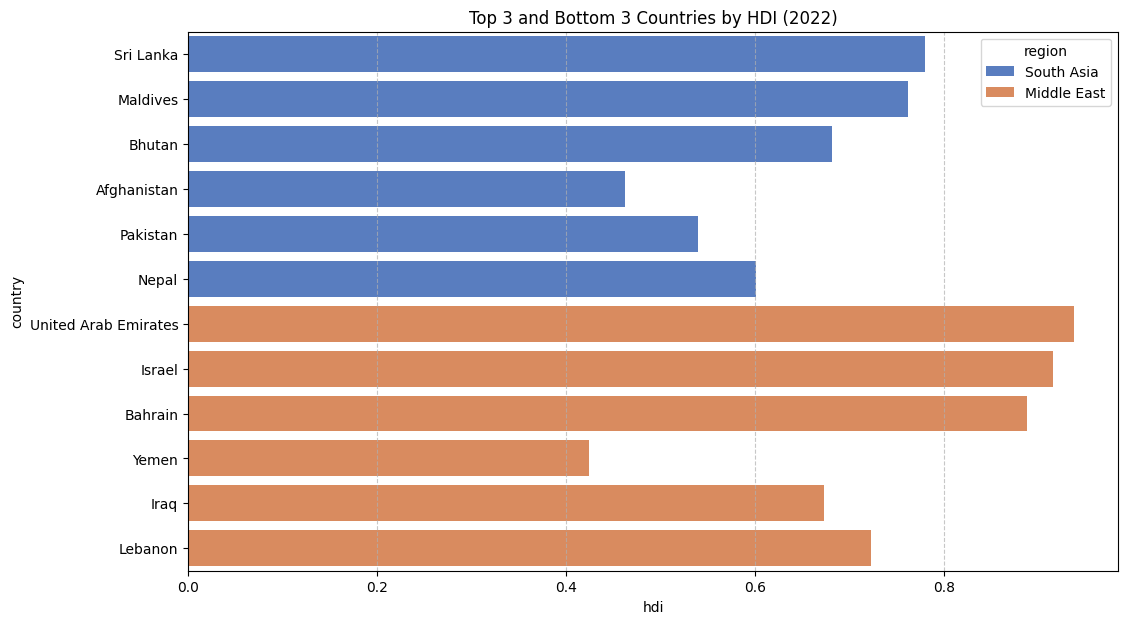

In [36]:
# Get Top 3 and Bottom 3 for 2022
top_bot_sa = pd.concat([df_sa[df_sa['year']==2022].nlargest(3, 'hdi'),
                        df_sa[df_sa['year']==2022].nsmallest(3, 'hdi')])

top_bot_me = pd.concat([df_me[df_me['year']==2022].nlargest(3, 'hdi'),
                        df_me[df_me['year']==2022].nsmallest(3, 'hdi')])


top_bot_sa['region'] = 'South Asia'
top_bot_me['region'] = 'Middle East'


comparison_df = pd.concat([top_bot_sa, top_bot_me])

# Plot
plt.figure(figsize=(12, 7))

sns.barplot(data=comparison_df, x='hdi', y='country', hue='region', palette='muted')

plt.title('Top 3 and Bottom 3 Countries by HDI (2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [39]:
print(combined_regions.columns.tolist())

['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons', 'region']


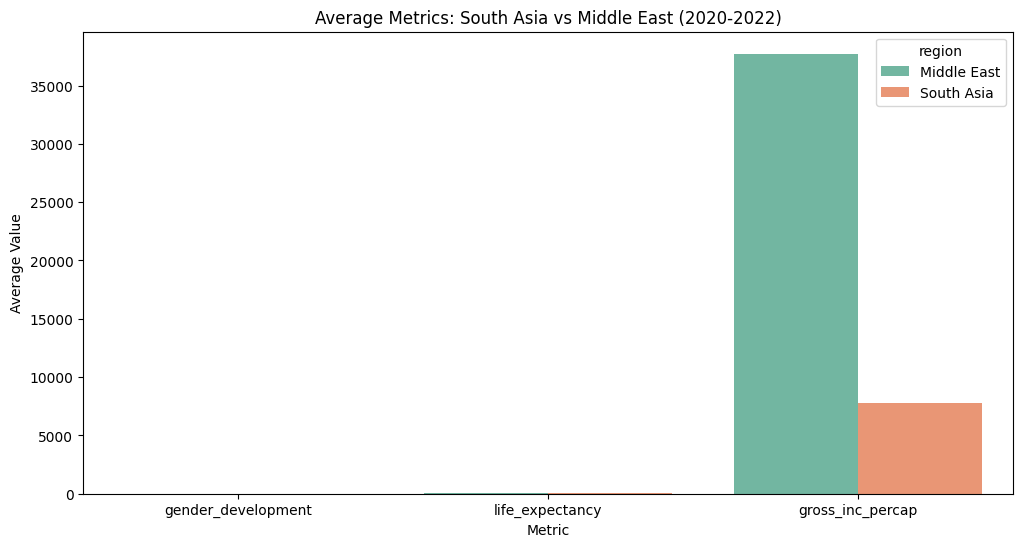

The greatest disparity is likely seen in 'gross_inc_percap'.


In [40]:
# Task 4: Metric Comparisons
df_sa['region'] = 'South Asia'
df_me['region'] = 'Middle East'
combined_regions = pd.concat([df_sa, df_me])

# Use your exact column names
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

# Calculate averages
comparison_metrics = combined_regions.groupby('region')[metrics].mean().reset_index()

# Reshaping for plotting
melted_metrics = comparison_metrics.melt(id_vars='region', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_metrics, x='Metric', y='Average Score', hue='region', palette='Set2')
plt.title('Average Metrics: South Asia vs Middle East (2020-2022)')
plt.ylabel('Average Value')
plt.show()

print("The greatest disparity is likely seen in 'gross_inc_percap'.")

In [41]:
# Task 5: HDI Disparity (Range and CV)Task 5: HDI Disparity (Range and CV)
# Calculate Range and Coefficient of Variation
def get_disparity(df, name):
    hdi_range = df['hdi'].max() - df['hdi'].min()
    cv = df['hdi'].std() / df['hdi'].mean()
    print(f"{name} -> Range: {hdi_range:.4f}, CV: {cv:.4f}")
    return cv

sa_cv = get_disparity(df_sa, "South Asia")
me_cv = get_disparity(df_me, "Middle East")

if me_cv > sa_cv:
    print("Conclusion: The Middle East has more variation (disparity) in HDI.")
else:
    print("Conclusion: South Asia has more variation (disparity) in HDI.")

South Asia -> Range: 0.3210, CV: 0.1537
Middle East -> Range: 0.5130, CV: 0.1791
Conclusion: The Middle East has more variation (disparity) in HDI.


South Asia Correlation - HDI vs Gender: 0.87, HDI vs Life Exp: 0.94
Middle East Correlation - HDI vs Gender: 0.94, HDI vs Life Exp: 0.93


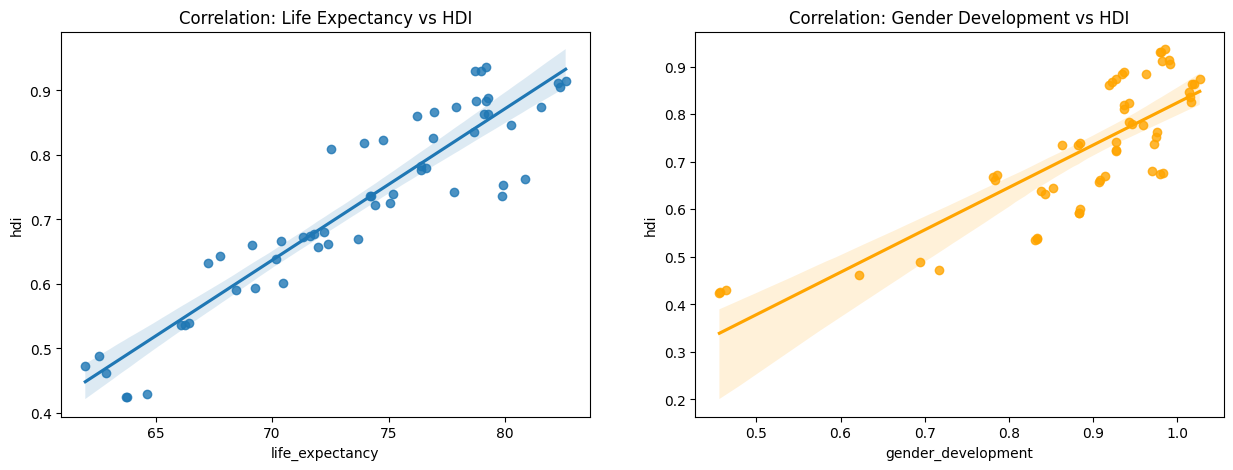

In [42]:
# Task 6: Correlation Analysis
# Correlation calculation
for name, data in [("South Asia", df_sa), ("Middle East", df_me)]:
    corr_gender = data['hdi'].corr(data['gender_development'])
    corr_life = data['hdi'].corr(data['life_expectancy'])
    print(f"{name} Correlation - HDI vs Gender: {corr_gender:.2f}, HDI vs Life Exp: {corr_life:.2f}")

# Plotting with Trendlines
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(data=combined_regions, x='life_expectancy', y='hdi', ax=axes[0])
axes[0].set_title('Correlation: Life Expectancy vs HDI')

sns.regplot(data=combined_regions, x='gender_development', y='hdi', ax=axes[1], color='orange')
axes[1].set_title('Correlation: Gender Development vs HDI')

plt.show()

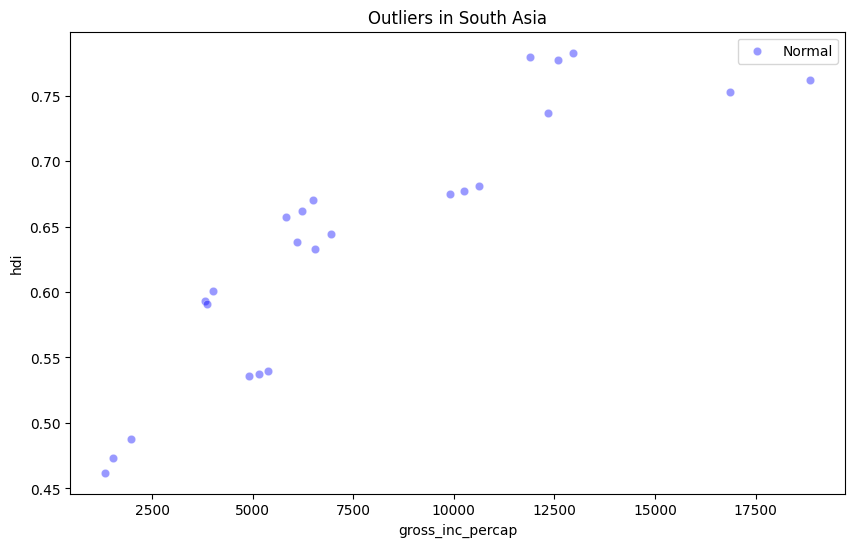

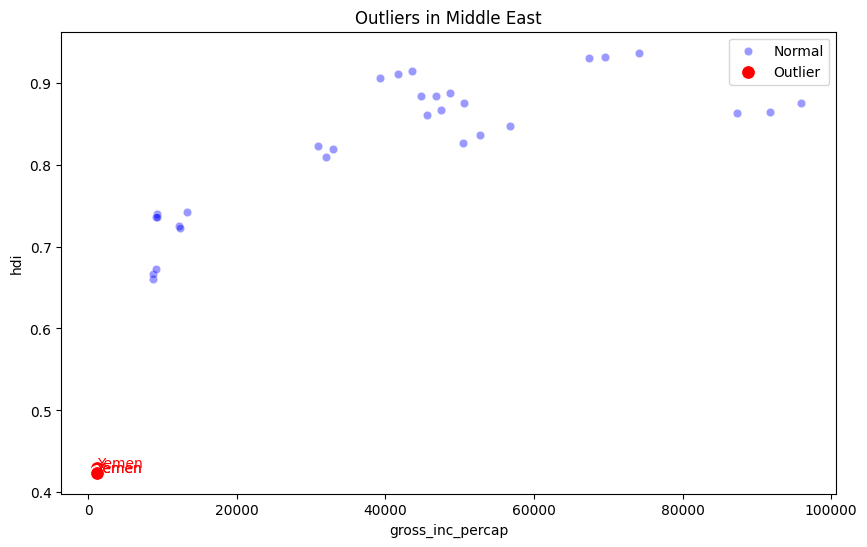

In [43]:
# Task 7: Outlier Detection (1.5 × IQR)
def find_outliers_final(df, region_name):
    # Math for HDI outliers
    q1 = df['hdi'].quantile(0.25)
    q3 = df['hdi'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df['hdi'] < lower) | (df['hdi'] > upper)]

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='gross_inc_percap', y='hdi', color='blue', alpha=0.4, label='Normal')
    sns.scatterplot(data=outliers, x='gross_inc_percap', y='hdi', color='red', s=100, label='Outlier')

    # Add labels for outliers
    for i in range(outliers.shape[0]):
        plt.text(outliers['gross_inc_percap'].iloc[i], outliers['hdi'].iloc[i],
                 outliers['country'].iloc[i], color='red')

    plt.title(f'Outliers in {region_name}')
    plt.show()
    return outliers

sa_outliers = find_outliers_final(df_sa, "South Asia")
me_outliers = find_outliers_final(df_me, "Middle East")